# PROJECT: WRANGLE AND ANALYZE WERATEDOGS TWITTER DATA
Aspects covered:

<ul>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#analyze">Analyzing and Visualizing Data</a></li>
</ul>


<a id='gather'></a>
## Gathering Data
- Step 1: Directly download the WeRateDogs twitter archive data (twitter-archieve-enhanced.csv)

In [1]:
import pandas as pd

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- Step 2: Use the request library to programmatically download the tweet image prediction file (image-predictions.tsv) from the udacity server

In [4]:
import requests

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [6]:
r.status_code

200

In [7]:
# save the response as a tsv file named image-predictions
with open("image-predictions.tsv", "w") as f:
    f.write(r.text)

In [8]:
# load the saved file in pandas
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [9]:
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- Step 3: Use the tweepy library to accesss additional dataa from the twitter API (tweet_json.txt)

In [10]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [11]:
# read json file
tweet_data = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet_data.append(json.loads(line))

In [12]:
# load file to dataframe selecting specific columns
df_3 = pd.DataFrame(tweet_data, columns=['id','retweet_count','favorite_count'])

In [13]:
df_3

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


<a id='assess'></a>
## Assessing Data

In [14]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# rating_denominator not equal to 10
# there are 23 of such
df_1.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [17]:
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_2['p1'].nunique()

378

In [20]:
df_3

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [21]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### QUALITY ISSUES
**Table 1: twitter archive enhanced data from WeRateDogs**
1. Completeness - Missing values in dog name and dog stage (can't clean)
2. Accuracy - Inaccurate representation of missing values in dog name and dog stage  i.e., None is used instead of NaN
3. Accuracy - Incorrect dog name such as a, and, the, all.
4. Accuracy - Incorrect values in rating numerator and rating denominator 
5. Consistency - Only original tweets (not retweets) with image prediction in image prediction table are required
6. Validity - Timestamp datatype should be datetime not string
7. Validity - Tweet id represented as integer instead of string


**Table 2: image prediction data**

8. Validity - Tweet id should be string not integer


**Table 3: Additional data from twitter API**

9. Consistency - tweet id column is named 'id' which is inconsistent with column name of table 1 and 2.
10. Validity - tweet id should be string not integer


#### TIDINESS ISSUES
**Column headers are values, not variable names**
- The columns doggo, pupper, fluffer and puppo are values of the dog stage variable.

**Multiple variables stored in one column**
- Text column contains both tweet text and tweet url

**One type of observational unit in multiple tables**
- Table 1, Table 2 and Table 3 belong to a single type of observational unit 

<a id='clean'></a>
## Cleaning Data

In [22]:
# copy the original dataset
df1 = df_1.copy()
df2 = df_2.copy()
df3 = df_3.copy()

### Cleaning identified Data Quality Issues

#### Issue #1: Missing Values in dog names and dog 'stages'
- This issue cannot be cleaned, as that information is not present in the tweet text, from which the dog name and dog 'stage' was originally extracted.

#### Issue #2: Inaccurate representation of missing values in dog name and dog 'stage'
- replace missing values defined as 'None' with NaN using pandas `replace` function 

In [23]:
import numpy as np

In [24]:
# replace 'None' with NaN
df1.replace('None', np.nan, inplace=True)

#### Test

In [25]:
# view
df1.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


#### Issue #3: Incorrect dog name 
- Use visual assessment to compare the text and name columns, checking for incorrect names
- Replace identified incorrect names with the accurate names
- Replace incorrect names that don't have an actual name with NaN

From visual assessment, all actual dog name starts with uppercase, so I'll use `islower` to check for names that start with lower case in name column and use these for comparison.

In [26]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [27]:
# get names that might be incorrect
inc_names = []
for name in df1['name']:
    if name is np.nan:
        pass
    elif name[0].islower():
        if name not in inc_names:
            inc_names.append(name)

# inc_names

In [28]:
# create dict with index and correct names
names_dict = {369: 'Grace', 649: 'Forrest', 852: 'Zoey', 1853: 'Wylie', 1955: 'Kip', 2034: 'Jacob', 2066: 'Rufus', 2116: 'Spork', 
 2125: 'Cherokee', 2128: 'Henry', 2146: 'Alphred', 2161: 'Alfredo', 2191: 'leroi', 2204: 'Berta', 2218: 'Chuk', 
 2235: 'Alfonso', 2249: 'Cheryl', 2255: 'Jessica', 2264: 'Klint', 2273: 'Kohl', 2287: 'Daryl', 2304: 'Pepe', 
 2311: 'Octaviath', 2314: 'John'}

In [29]:
# replace incorrect names with the found correct names
for i in names_dict.keys():
    df1.loc[i, 'name'] = names_dict[i]

In [30]:
# replace inaccurate names that have no actual name with NaN
df1['name'].replace(inc_names, np.nan, inplace=True)

#### Test

In [31]:
# pd.options.display.max_rows = 999  #adjust max rows display
df1.name.value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
              ..
Tayzie         1
Grizzie        1
Gilbert        1
Zoe            1
Christoper     1
Name: name, Length: 951, dtype: int64

#### Issue #4: Inaccurate values in rating numerator and rating denominator
- Use visual assessment to compare text and ratings to identify inaccurate values in rating numerator and rating denominator

>_Here, I assessed the accuracy of values in rating numerator that were less than 10 and values above the mean (i.e., 13). For the rating denominator, the accuracy of all values unequal to 10 was checked._

- Replace identified inaccurate values with the correct rating values


In [32]:
# pd.options.display.max_rows = 999
df1.query('rating_numerator < 10 | rating_numerator > 13')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,NaN,NaN,NaN,NaN,NaN
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,NaN,NaN,NaN,NaN,NaN
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,NaN,NaN,NaN,NaN,NaN
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,NaN,NaN,NaN


In [33]:
df1.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,NaN,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,NaN,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,NaN,NaN,NaN


In [34]:
# replace identified inaccurate rating denominator
df1.loc[[784, 1068, 1165, 1202, 1662, 2335], ['rating_denominator']] = 10

In [35]:
# create dictionary of index and correct rating numerator as key-value pairs
rating_dict = {45: 13.5, 340: 9.75, 763: 11.27, 784: 14, 1068: 14, 1165: 13, 1202: 11, 1459: 13, 1508: 10, 1662: 10, 1689: 9.5, 
          1712: 11.26, 2260: -5, 2335: 9}

# replace identified inaccurate rating numerator
for i in rating_dict.keys():
    df1.loc[i, 'rating_numerator'] = rating_dict[i]

In [36]:
# 342 and 516 has no accurate rating so replace with NaN
df1.loc[[342, 516], ['rating_numerator', 'rating_denominator']] = np.nan

In [37]:
# round up decimal values
df1.loc[:, 'rating_numerator'] = df1['rating_numerator'].apply(np.ceil)
 
df1.loc[:, 'rating_denominator'] = df1['rating_denominator'].apply(np.ceil)

In [38]:
df1.rating_numerator.value_counts()

 12.0      560
 10.0      465
 11.0      464
 13.0      353
 9.0       157
 8.0       102
 14.0       57
 7.0        54
 5.0        33
 6.0        32
 3.0        19
 4.0        15
 2.0         9
 1.0         8
 420.0       2
 15.0        2
 0.0         2
 121.0       1
 144.0       1
 88.0        1
 80.0        1
 20.0        1
 143.0       1
 44.0        1
 60.0        1
 45.0        1
 75.0        1
 99.0        1
 204.0       1
 1776.0      1
 165.0       1
 84.0        1
 960.0       1
 182.0       1
 666.0       1
 17.0        1
-5.0         1
Name: rating_numerator, dtype: int64

#### Test

In [39]:
df1.loc[[45,340,342,516,763,784,1068,1165,1202,1459,1508,1662,1689,1712,2260,2335], ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
45,14.0,10.0
340,10.0,10.0
342,NaN,NaN
516,NaN,NaN
763,12.0,10.0
784,14.0,10.0
1068,14.0,10.0
1165,13.0,10.0
1202,11.0,10.0
1459,13.0,10.0


#### Issue #7: Removing retweets and tweets that do not have image prediction in table 2
- Select all tweets id that have retweet status id using `notnull` function
- use pandas `drop` function to drop all selected retweets
- select only rows that have images in image prediction table

In [40]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN,NaN,NaN,NaN


In [41]:
# select all rows that are retweets
rows = df1.loc[df1['retweeted_status_id'].notnull()].index

# drop all selected rows
df1.drop(rows, axis=0, inplace=True)

In [42]:
# drop retweets columns
df1.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [43]:
# select tweet id that have image prediction in table 2
images_pred = df1['tweet_id'].isin(df2['tweet_id'])

In [44]:
images_pred

0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352    True
2353    True
2354    True
2355    True
Name: tweet_id, Length: 2175, dtype: bool

In [45]:
df1 = df1[images_pred]

#### Test

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1993 non-null   float64
 8   rating_denominator     1993 non-null   float64
 9   name                   1374 non-null   object 
 10  doggo                  74 non-null     object 
 11  floofer                8 non-null      object 
 12  pupper                 212 non-null    object 
 13  puppo                  23 non-null     object 
dtypes: float64(4), int64(1), object(9)
memory usage: 233.7+ 

In [47]:
df1.shape

(1994, 14)

#### Issue #6: Inappropriate datatype of timestamp
- Convert the datatype of timestamp column from string to datetime

In [69]:
# convert to datetime
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

C:\Users\Ose\AppData\Local\Temp/ipykernel_2204/2349841623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = pd.to_datetime(df1['timestamp'])


#### Test

In [60]:
df1.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                datetime64[ns, UTC]
source                                object
text                                  object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Issue #7: Table 1 Tweet id should be string not integer
- Convert the datatype of tweet id to string

In [63]:
# convert tweet id to string
df1.loc[:, ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']] = df1[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']].astype(str)

#### Test

In [64]:
df1.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                datetime64[ns, UTC]
source                                object
text                                  object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Issue #8: Table 2 Tweet id should be string not integer
- convert the datatype of tweet id to string

In [70]:
# convert tweet id to string
df2.tweet_id = df2.tweet_id.astype(str)

#### Test

In [71]:
df2.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### Issue #9: tweet id for table 3 named id, instead of tweet id
- rename the column 'id' in table 3 to 'tweet_id' using `rename` function

In [72]:
df3.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [73]:
df3.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### Issue #10: Table 3 tweet id should be string, not integer
- Convert the datatype of tweet id to string

In [74]:
# convert tweet id to string
df3.tweet_id = df3.tweet_id.astype(str)

#### Test

In [75]:
df3.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

### Cleaning identified Data Tidiness issues

#### Issue #1: The columns doggo, pupper, fluffer and puppo are values of the dog stage variable.
* use pandas `melt` function to melt the columns 'doggo' and 'floofer' into a dataframe and the columns 'pupper' and 'puppo' into another dataframe
* concatenate both dataframe into one dataframe using pandas `concat` function
* use `merge` function to join the 'dog_stage' dataframe with df1 on tweet_id
* drop the 'doggo', 'floofer', 'pupper' and 'puppo' columns in df1

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  1994 non-null   object             
 2   in_reply_to_user_id    1994 non-null   object             
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1993 non-null   float64            
 8   rating_denominator     1993 non-null   float64            
 9   name                   1374 non-null   object             
 10  doggo                  74 non-null     object             
 11  floofer                8 non-null      object           

In [77]:
# sum of notnull values in df1 'dog_stage' columns
dog_st = ['doggo', 'floofer', 'pupper', 'puppo']
count = 0
for i in dog_st:
    count += df1[i].value_counts()[0]
print(count)

317


In [78]:
# melt dataframe by the dog stage columns
stage_1 = pd.melt(df1, id_vars='tweet_id', value_vars=['doggo', 'floofer'], var_name='dog_stage')
stage_2 = pd.melt(df1, id_vars='tweet_id', value_vars=['pupper', 'puppo'], var_name='dog_stage')

# filter by values that are not NaN in each stage df
stage_1 = stage_1[stage_1['value'].notnull()].iloc[:, :-1].reset_index(drop=True)
stage_2 = stage_2[stage_2['value'].notnull()].iloc[:, :-1].reset_index(drop=True)

# veiw
stage_1, stage_2

(              tweet_id dog_stage
 0   890240255349198849     doggo
 1   884162670584377345     doggo
 2   872967104147763200     doggo
 3   871515927908634625     doggo
 4   869596645499047938     doggo
 ..                 ...       ...
 77  776218204058357768   floofer
 78  749317047558017024   floofer
 79  737445876994609152   floofer
 80  733822306246479872   floofer
 81  685307451701334016   floofer
 
 [82 rows x 2 columns],
                tweet_id dog_stage
 0    886366144734445568    pupper
 1    882762694511734784    pupper
 2    881536004380872706    pupper
 3    876838120628539392    pupper
 4    874296783580663808    pupper
 ..                  ...       ...
 230  752519690950500352     puppo
 231  751132876104687617     puppo
 232  744995568523612160     puppo
 233  743253157753532416     puppo
 234  738537504001953792     puppo
 
 [235 rows x 2 columns])

In [79]:
# join the two stage df's
dog_stage = pd.concat([stage_1, stage_2], axis=0)

dog_stage

,tweet_id,dog_stage
0,890240255349198849,doggo
1,884162670584377345,doggo
2,872967104147763200,doggo
3,871515927908634625,doggo
4,869596645499047938,doggo
...,...,...
230,752519690950500352,puppo
231,751132876104687617,puppo
232,744995568523612160,puppo
233,743253157753532416,puppo


In [80]:
# merge the dog_stage df to df1 by matching tweet_id
df1 = pd.merge(df1, dog_stage, how='left', on='tweet_id')

In [81]:
# assess
df1.dog_stage.value_counts()

pupper     212
doggo       74
puppo       23
floofer      8
Name: dog_stage, dtype: int64

In [82]:
# check for correctness of dog_stage column
df1[df1['dog_stage'].isin(dog_st)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
9,890240255349198849,nan,nan,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,NaN,NaN,NaN,doggo
12,889665388333682689,nan,nan,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,NaN,NaN,NaN,NaN,puppo,puppo
14,889531135344209921,nan,nan,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,NaN,NaN,NaN,puppo,puppo
28,886366144734445568,nan,nan,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10.0,Roscoe,NaN,NaN,pupper,NaN,pupper
37,884162670584377345,nan,nan,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,Yogi,doggo,NaN,NaN,NaN,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,672594978741354496,nan,nan,2015-12-04 01:55:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9.0,10.0,Scott,NaN,NaN,pupper,NaN,pupper
1658,672481316919734272,nan,nan,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12.0,10.0,Jazz,NaN,NaN,pupper,NaN,pupper
1665,672254177670729728,nan,nan,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11.0,10.0,Rolf,NaN,NaN,pupper,NaN,pupper
1671,672205392827572224,nan,nan,2015-12-03 00:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,https://twitter.com/dog_rates/status/672205392...,9.0,10.0,Opal,NaN,NaN,pupper,NaN,pupper


In [83]:
# drop the doggo, floofer, pupper and puppo columns in df1
# dog_st is a list of these dog stages
df1.drop(dog_st, axis=1, inplace=True)

#### Test

In [84]:
df1.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [85]:
df1['dog_stage'].value_counts(dropna=False)

NaN        1688
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [86]:
assert df1.dog_stage.value_counts().sum() == count

#### Issue 2: Text column contains both tweet text and tweet url
* extract the tweet url part from the text column and save as a new column on same table
* split the text column using https as delimiter string and return index 0 values

In [87]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2000,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN
2001,666044226329800704,nan,nan,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,NaN
2002,666033412701032449,nan,nan,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,NaN
2003,666029285002620928,nan,nan,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN


In [88]:
# extract the url from the text column
df1['tweet_url'] = df1['text'].str.extract('(https://t.co/[a-zA-Z0-9]+)', expand = True)

In [89]:
# remove the url included in text column
df1['text'] = df1['text'].apply(lambda x: x.split('https')[0])

#### Test

In [90]:
df1[['text', 'tweet_url']].head()

,text,tweet_url
0,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU
1,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV
2,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB
3,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ
4,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f


In [91]:
df1.text[9]

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate '

#### Issue #3: Merge twittle archive, additional data and image prediction tables into a single table
* merge table 1 (twitter archive data) and table 3 (additional twitter data) as df_master
* merge df_master with image prediction table

In [92]:
df_master = pd.merge(df1, df3, how = 'left', on = 'tweet_id')

#### Test

In [93]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_url,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://t.co/MgUWQ76dJU,8853,39467
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://t.co/0Xxu71qeIV,6514,33819
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://t.co/wUnZnhtVJB,4328,25461
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://t.co/tD36da7qLQ,8964,42908
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://t.co/AtUZn91f7f,9774,41048


In [94]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2005 non-null   object             
 1   in_reply_to_status_id  2005 non-null   object             
 2   in_reply_to_user_id    2005 non-null   object             
 3   timestamp              2005 non-null   datetime64[ns, UTC]
 4   source                 2005 non-null   object             
 5   text                   2005 non-null   object             
 6   expanded_urls          2005 non-null   object             
 7   rating_numerator       2004 non-null   float64            
 8   rating_denominator     2004 non-null   float64            
 9   name                   1378 non-null   object             
 10  dog_stage              317 non-null    object             
 11  tweet_url              2005 non-null   object           

> * merge df_master with image prediction table

In [95]:
# merge df_master with image prediction table
df_master_final = pd.merge(df_master, df2, how = 'left', on = 'tweet_id')

#### Test

In [96]:
df_master_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2005 non-null   object             
 1   in_reply_to_status_id  2005 non-null   object             
 2   in_reply_to_user_id    2005 non-null   object             
 3   timestamp              2005 non-null   datetime64[ns, UTC]
 4   source                 2005 non-null   object             
 5   text                   2005 non-null   object             
 6   expanded_urls          2005 non-null   object             
 7   rating_numerator       2004 non-null   float64            
 8   rating_denominator     2004 non-null   float64            
 9   name                   1378 non-null   object             
 10  dog_stage              317 non-null    object             
 11  tweet_url              2005 non-null   object           

In [97]:
df_master_final.shape

(2005, 25)



___Renaming the final cleaned dataframe___

In [98]:
twitter_archive_master = df_master_final

In [99]:
twitter_archive_master.shape

(2005, 25)

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [100]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

<a id='analyze'></a>
## Analyzing and Visualizing Data

* Load the cleaned dataset saved as `twitter_archive_master.csv` into a pandas dataframe
* You must produce at least three (3) insights and one (1) visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('twitter_archive_master.csv')

In [3]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2001,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2002,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2003,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2005 non-null   int64  
 1   in_reply_to_status_id  24 non-null     float64
 2   in_reply_to_user_id    24 non-null     float64
 3   timestamp              2005 non-null   object 
 4   source                 2005 non-null   object 
 5   text                   2005 non-null   object 
 6   expanded_urls          2005 non-null   object 
 7   rating_numerator       2004 non-null   float64
 8   rating_denominator     2004 non-null   float64
 9   name                   1378 non-null   object 
 10  dog_stage              317 non-null    object 
 11  tweet_url              2005 non-null   object 
 12  retweet_count          2005 non-null   int64  
 13  favorite_count         2005 non-null   int64  
 14  jpg_url                2005 non-null   object 
 15  img_

In [5]:
df[["rating_numerator", "rating_denominator", "favorite_count", "retweet_count"]].describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2004.000000,2004.000000,2005.000000,2005.000000
mean,12.258982,10.508982,8935.604988,2781.190025
std,41.380235,7.243047,12238.792356,4688.295617
min,0.000000,10.000000,81.000000,16.000000
25%,10.000000,10.000000,2011.000000,629.000000
50%,11.000000,10.000000,4163.000000,1367.000000
75%,12.000000,10.000000,11332.000000,3224.000000
max,1776.000000,170.000000,132810.000000,79515.000000


###  Most common dog names

In [6]:
df.name.value_counts()

Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
              ..
Theo           1
Rocco          1
Fido           1
Emma           1
Christoper     1
Name: name, Length: 933, dtype: int64

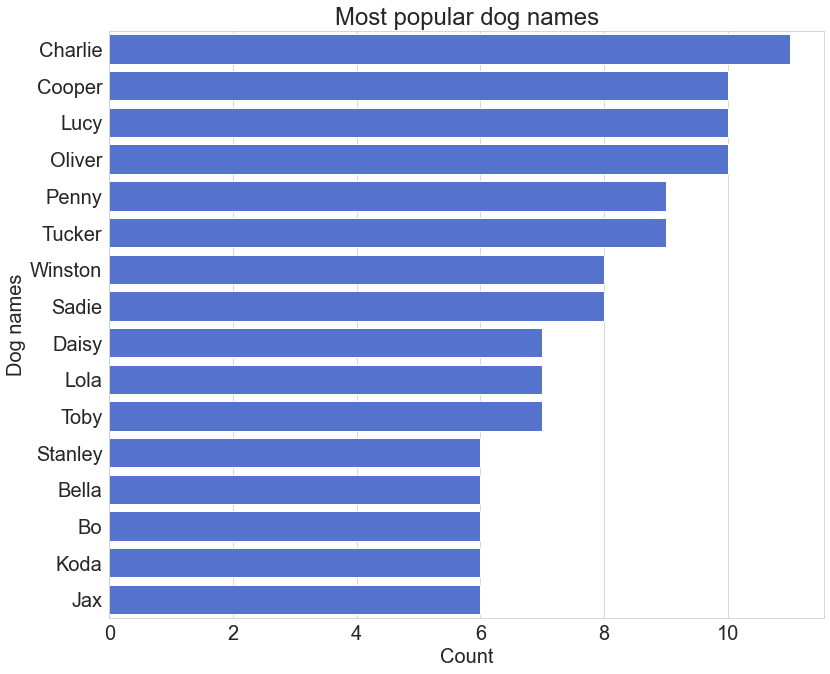

In [44]:
# plot value count for dog name
name_count = df['name'].value_counts()
name_count = name_count.loc[name_count > 5] #select names with more than 4 occurence
fig, ax = plt.subplots(figsize=(12.8, 10.8))
y = name_count.index
x = name_count.values
p = sns.barplot(x=x, y=y, color="royalblue")
p.set(title="Most popular dog names", xlabel="Count", ylabel="Dog names")
plt.rcParams['font.size'] = '20'
sns.set_style("darkgrid")

It is evident that the most common dog name is Charlie, closely followed by Cooper, Lucy and Oliver.

### Count of dog stages

In [6]:
df.dog_stage.value_counts()

pupper     212
doggo       74
puppo       23
floofer      8
Name: dog_stage, dtype: int64

Text(0.5, 0, 'Dog Stages')

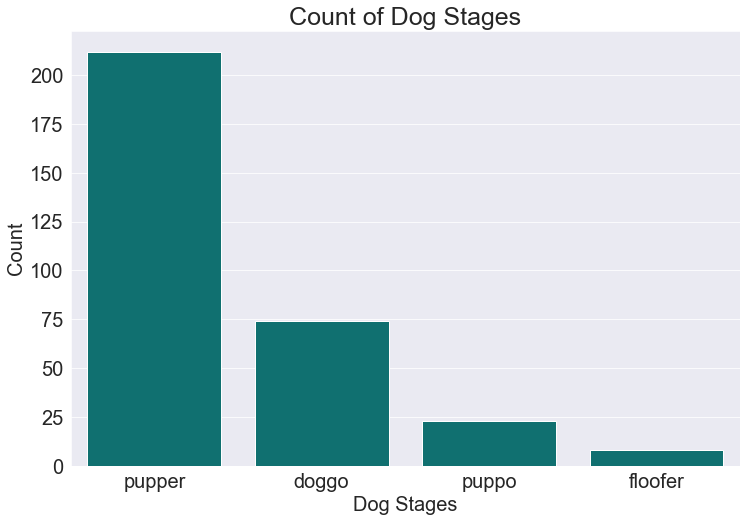

In [38]:
# plot value count for dog stage
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df, x='dog_stage', order= df.dog_stage.value_counts().index, color="teal")
sns.set_style("darkgrid")
plt.title('Count of Dog Stages', fontsize=25)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Dog Stages', fontsize=20)

It can be observed that pupper is the most common dog stage, followed by doggo and puppo. floofer is the least common dog stage. However, let's further analyze these stages based on most likes (popular) using favorite count and retweet count.

### Analysis of dog stages
Here, the dog stages will be analyzed based on the favorite count, retweet count and ratings
> - **Analysis of dog stages based on favorite count**

In [13]:
df.groupby('dog_stage').favorite_count.mean().sort_values(ascending=False) 

dog_stage
puppo      22723.913043
doggo      18881.932432
floofer    13701.375000
pupper      7424.240566
Name: favorite_count, dtype: float64

In [14]:
df.groupby('dog_stage').favorite_count.median().sort_values(ascending=False)

dog_stage
puppo      15359.0
doggo      12029.0
floofer    11879.0
pupper      3393.5
Name: favorite_count, dtype: float64

Here, we can observe that pupper which is the most common dog stage based on previous findings, has the least number of likes based on the mean and median measure, whereas puppo which is the second least common dog stage, has the highest number of likes based on both the mean and median measure.

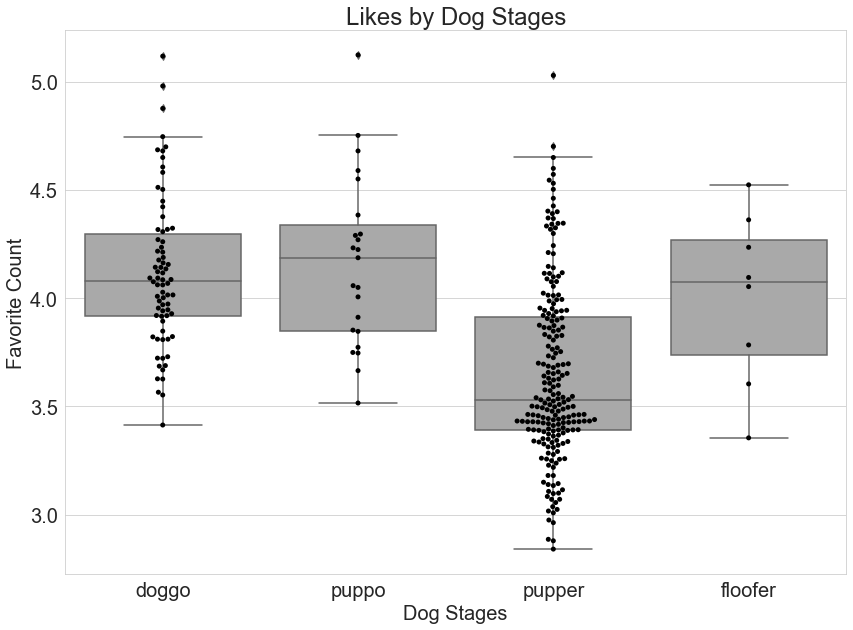

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax = sns.boxplot(data=df, x='dog_stage', y=np.log10(df.favorite_count), color="darkgrey")
ax = sns.swarmplot(data=df, x='dog_stage', y=np.log10(df.favorite_count), color="black")
ax.set(title="Likes by Dog Stages", xlabel="Dog Stages", ylabel="Favorite Count")
plt.rcParams['font.size'] = '20'
sns.set_style("whitegrid")

From the visualization, there is no significant difference between the average favorite count for doggo and floofer.

>- **Analysis of dog stages based on retweet count**

In [16]:
df.groupby('dog_stage').retweet_count.mean().sort_values(ascending=False)

dog_stage
puppo      7027.086957
doggo      6868.905405
floofer    4776.750000
pupper     2436.594340
Name: retweet_count, dtype: float64

In [17]:
df.groupby('dog_stage').retweet_count.median().sort_values(ascending=False)

dog_stage
floofer    3349.0
puppo      3220.0
doggo      3106.0
pupper     1256.0
Name: retweet_count, dtype: float64

From the above, it is evident that pupper which is the most common dog stage based on previous findings, has the least number of retweets as per the mean and median measure. However, puppo, which was the second least common dog stage, has the highest number of retweets as per the mean measure while floofer, which was the least common dog stage, has the highest number of retweets as per the median measure.

Since the retweet counts has very large values at the end and mean is easily affected by extreme values, it is not the most accurate measure of central tendency in this case. Hence, we will be using the median value as the more accurate measure in this case, with floofer as the dog stage with the highest retweets, followed by puppo and doggo.

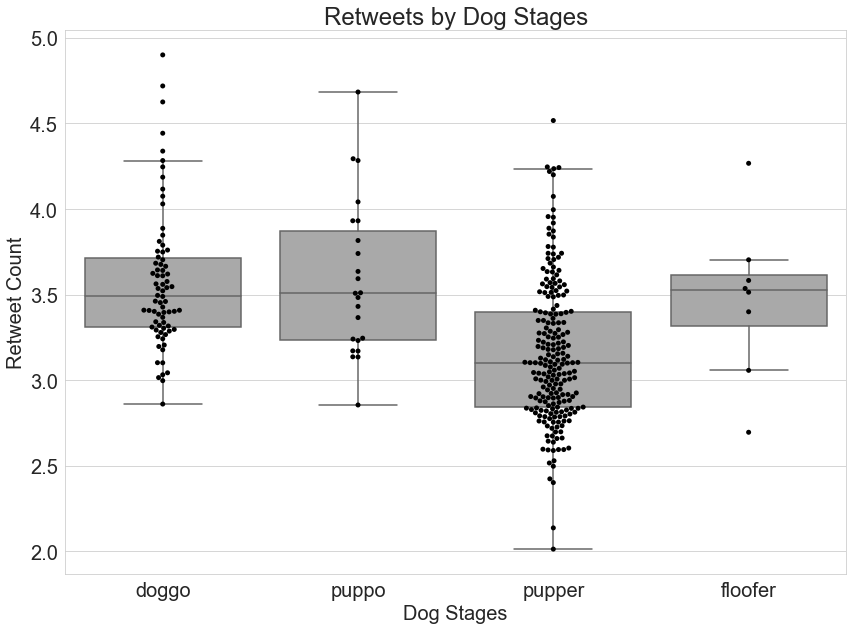

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax = sns.boxplot(data=df, x='dog_stage', y=np.log10(df.retweet_count), color="darkgrey", showfliers=False)
ax = sns.swarmplot(data=df, x='dog_stage', y=np.log10(df.retweet_count), color="black")
ax.set(title="Retweets by Dog Stages", xlabel="Dog Stages", ylabel="Retweet Count")
plt.rcParams['font.size'] = '20'
sns.set_style("whitegrid")

It can be observed that there is no significant difference between the median measure of retweet for doggo and puppo, while floofer has a slighly higher median than doggo and puppo. However, significant differences exist between these three stages and pupper.

### Relationship between favorite count and retweet count

Text(0.5, 0, 'Retweet Count')

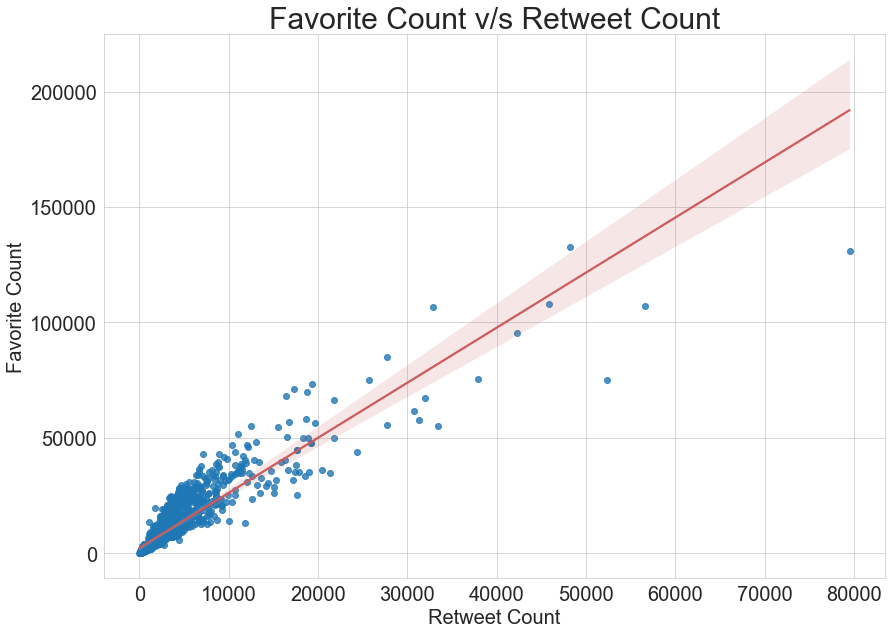

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.regplot(data=df, y='favorite_count', x='retweet_count', line_kws={"color": "indianred"})
plt.title('Favorite Count v/s Retweet Count', fontsize=30)
plt.ylabel('Favorite Count',fontsize=20)
plt.xlabel('Retweet Count', fontsize=20)

From the visualization above, it is evident that there is a positive linear relationship between favorite count and retweet count. However, majority of the points are clustered at the beginning of the plot indicating that both variables have a positively skewed distribution. Therefore, we will normalize the data using logarithmic transformation, in order to gain more insights into the strength of the relationship between the two variables.

Text(0.5, 0, 'Retweet Count')

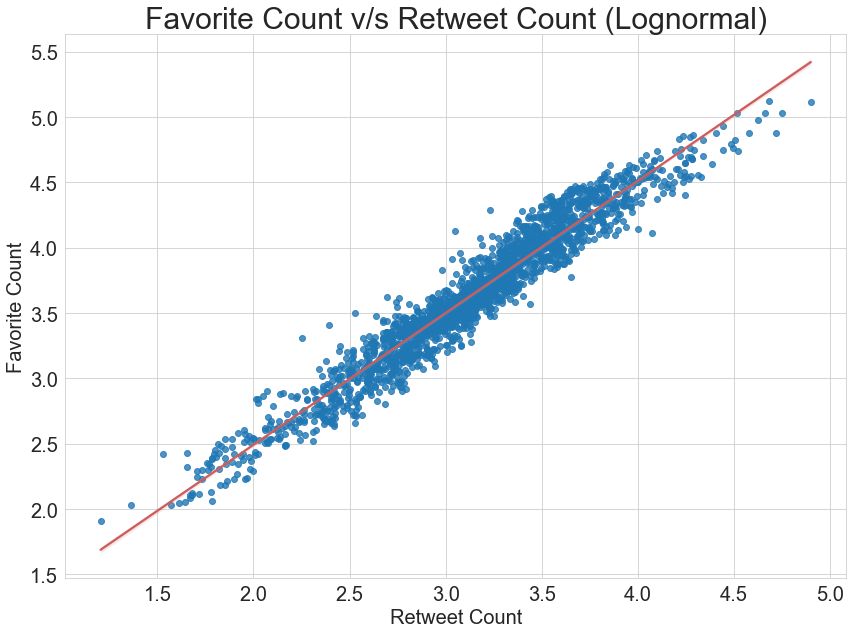

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.regplot(data=df, y=np.log10(df.favorite_count), x=np.log10(df.retweet_count), line_kws={"color": "indianred"})
plt.title('Favorite Count v/s Retweet Count (Lognormal)', fontsize=30)
plt.ylabel('Favorite Count',fontsize=20)
plt.xlabel('Retweet Count', fontsize=20)

From the normalized distribution, it is evident that there exist a strong positive relationship between favorite count and retweet count.

### Most Popular Dog Breeds

In [32]:
# select rows with true value in p1_dog
df_true = df.query('p1_dog == True')
df_true.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False


In [33]:
df_true.shape

(1487, 25)

In [34]:
top_10 = df_true.p1.value_counts().head(10)

In [35]:
# rename breeds name having underscore and capitalize first letter of each word
top_10.index = top_10.index.str.replace("_", " ").str.title()

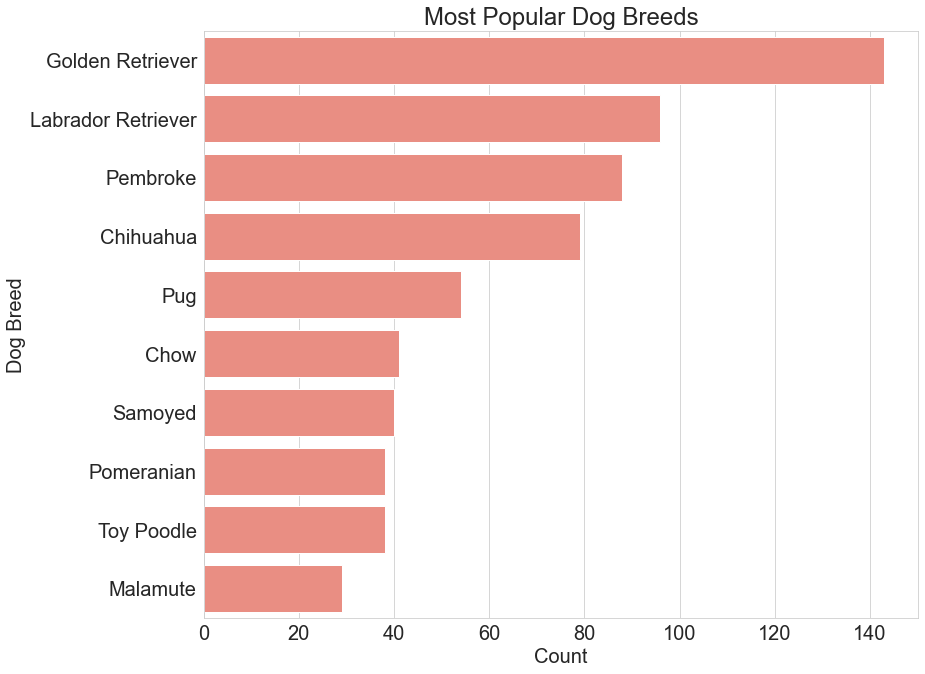

In [46]:
# plot value count for dog name
fig, ax = plt.subplots(figsize=(12.8, 10.8))
y = top_10.index
x = top_10.values
p = sns.barplot(x=x, y=y, color="salmon")
p.set(title="Most Popular Dog Breeds", xlabel="Count", ylabel="Dog Breed")
plt.rcParams['font.size'] = '20'
sns.set_style("whitegrid")

Based on the above finding, it is evident that the most popular dog breed is the Golden Retriever (143 dogs). This is followed by Labrador Retriever (96 dogs) and Pembroke (88 dogs).

### Insights:

Based on the above analysis of the cleaned dataset, the following insights were obtained.

1. The most common dog stage in the weratedogs tweets was pupper. However, it is interesting to note at this point that when the dog stages were analysed with relation to favorite count and retweet count, pupper got the least values in both the mean and median measure of favorite count and retweet count. This shows that the pupper stage was the least favorite dog stage although it was the most common in the weratedogs tweets.


2. Puppo which had the second least value in terms of tweets, was the most favorite dog stage based on the favorite count and the mean retweet count. Also, floofer, which had the least count in tweets, got the highest retweets based on the median measure.


3. The most common dog name was Charlie, with an occurence of 11. This was followed by Cooper, Lucy and Oliver, all of which have a count of 10.


4. There exist a strong positive correlation between favorite count and retweet count. Also, both columns have positively skewed distributions.


5. The most popular dog breed is Golden Retriever with 143 dogs. This was followed by Labrador Retriever, Pembroke, Chihuahua, Pug. Other popular breeds include Chow, Samoyed, Pomeranian, Toy Poodle and Malamute.
